                                                      Module 1
                                         Data Preprocessing and Visualization

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from lightgbm import LGBMClassifier
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

In [3]:
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder

In [84]:
df= pd.read_csv("C:\\Users\\LAU\\Downloads\\new proj\\base_data_new_2.csv")

In [85]:
df.dropna(inplace=True)

In [86]:
#duplicate rows
duplicate_rows = df[df.duplicated()]
print("Duplicate Rows:")
print(duplicate_rows)
df = df.drop_duplicates()

Duplicate Rows:
        InvoiceNo                        Description  Quantity  UnitPrice  \
587        536412               FELTCRAFT DOLL MOLLY         1       2.95   
3407       536796  AIRLINE BAG VINTAGE JET SET WHITE         2       4.25   
3410       536796                          SPACE OWL         1       1.25   
3436       536796          PACK OF 6 BIRDY GIFT TAGS         1       1.25   
3441       536796           PACK OF 12 SKULL TISSUES         1       0.29   
...           ...                                ...       ...        ...   
406595     581538        BLACK PIRATE TREASURE CHEST         1       0.39   
406609     581538     BOX OF 6 MINI VINTAGE CRACKERS         1       2.49   
406612     581538             REVOLVER WOODEN RULER          1       1.95   
406619     581538                       WICKER STAR          1       2.10   
406621     581538       JUMBO BAG VINTAGE CHRISTMAS          1       2.08   

        CustomerID         Country        date  Recency  Fr

<Axes: ylabel='Type'>

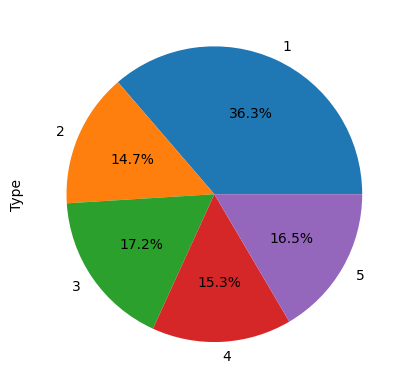

In [87]:
df.groupby('customer_segment').size().plot(kind='pie',
                                       y = "Dataset",
                                       label = "Type",
                                       autopct='%1.1f%%')

In [94]:
new_customer = df[df["customer_segment"] == 3]
need_attention = df[df["customer_segment"] == 4]
at_risk = df[df["customer_segment"] == 5]
regular=df[df["customer_segment"] == 1]
promising_customer=df[df["customer_segment"] == 2]
print(new_customer.shape)
print(need_attention.shape)
print(at_risk.shape)
print(regular.shape)
print(promising_customer.shape)

(69086, 15)
(61361, 15)
(66418, 15)
(145822, 15)
(58941, 15)


In [95]:
from sklearn.utils import resample
new_downsample = resample(new_customer,
             replace=True,
             n_samples=len(promising_customer),
             random_state=42)

print(new_downsample.shape)

(58941, 15)


In [96]:
need_downsample = resample(need_attention,
             replace=True,
             n_samples=len(promising_customer),
             random_state=42)

print(need_downsample.shape)

(58941, 15)


In [97]:
risk_downsample = resample(at_risk,
             replace=True,
             n_samples=len(promising_customer),
             random_state=42)

print(risk_downsample.shape)

(58941, 15)


In [98]:
regular_downsample= resample(regular,
             replace=True,
             n_samples=len(promising_customer),
             random_state=42)

print(regular_downsample.shape)

(58941, 15)


customer_segment
3    58941
4    58941
5    58941
1    58941
2    58941
Name: count, dtype: int64


<Axes: ylabel='Type'>

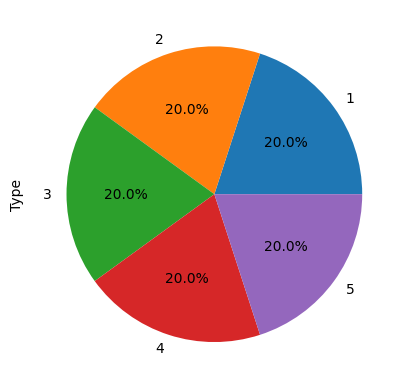

In [99]:
df_downsampled = pd.concat([new_downsample,need_downsample,risk_downsample,regular_downsample,promising_customer])

print(df_downsampled["customer_segment"].value_counts())

df_downsampled.groupby('customer_segment').size().plot(kind='pie',
                                       y = "Dataset",
                                       label = "Type",
                                       autopct='%1.1f%%')

In [100]:
df_downsampled.head()

,InvoiceNo,Description,Quantity,UnitPrice,CustomerID,Country,date,Recency,Frequency,Total_cost,Monetary,receny_score,frequency_score,monetary_score,customer_segment
278956,569638,HEART OF WICKER LARGE,6,2.95,16140,United Kingdom,2011-10-05,94,4,17.70,704,4,2,1,3
246562,566564,TRAVEL CARD WALLET I LOVE LONDON,24,0.42,15522,United Kingdom,2011-09-13,94,2,10.08,399,4,1,1,3
367850,577769,VINTAGE SNAP CARDS,12,0.85,16379,United Kingdom,2011-11-21,94,5,10.20,2132,5,2,3,3
259043,567873,PLAYING CARDS KEEP CALM & CARRY ON,12,1.25,13055,United Kingdom,2011-09-22,94,4,15.00,1202,4,2,2,3
326667,574063,STRAWBERRY FAIRY CAKE TEAPOT,1,4.95,13271,United Kingdom,2011-11-02,94,2,4.95,178,5,1,1,3


c:\Users\LAU\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\LAU\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


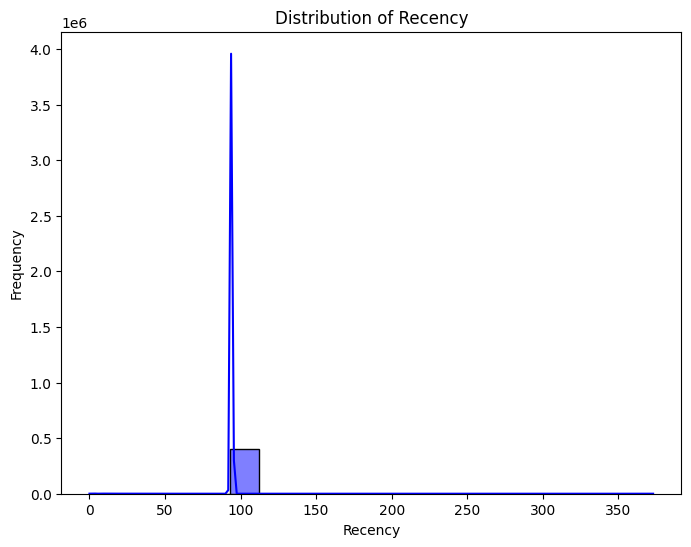

c:\Users\LAU\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\LAU\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


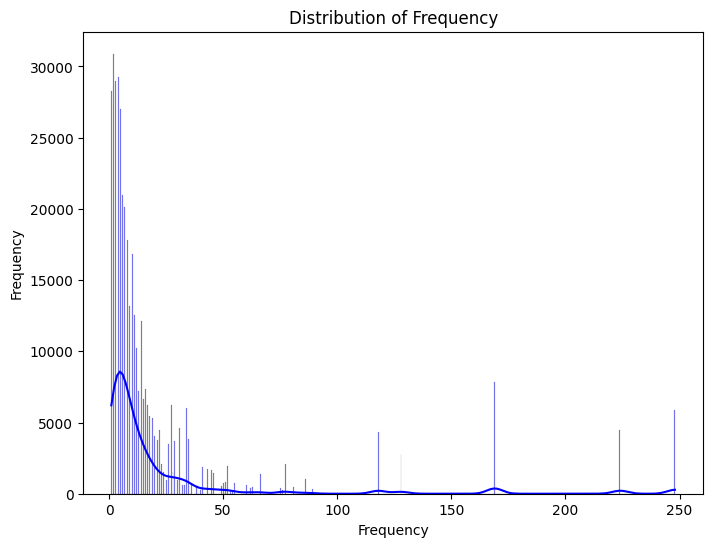

c:\Users\LAU\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\LAU\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


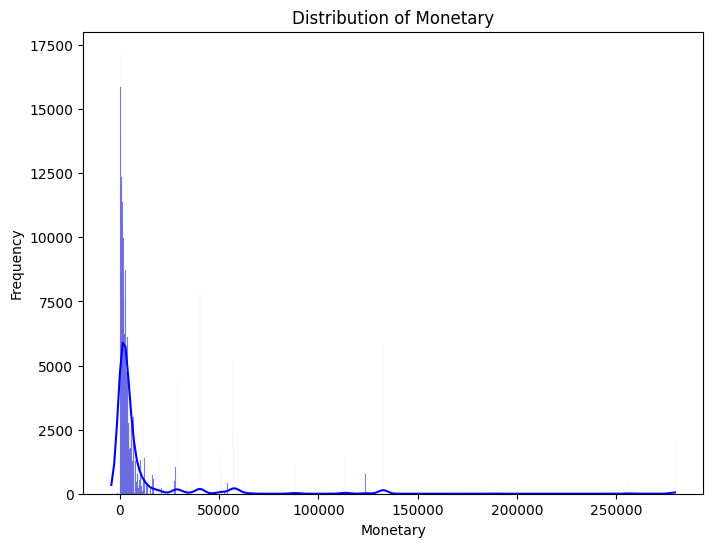

c:\Users\LAU\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\LAU\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\LAU\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


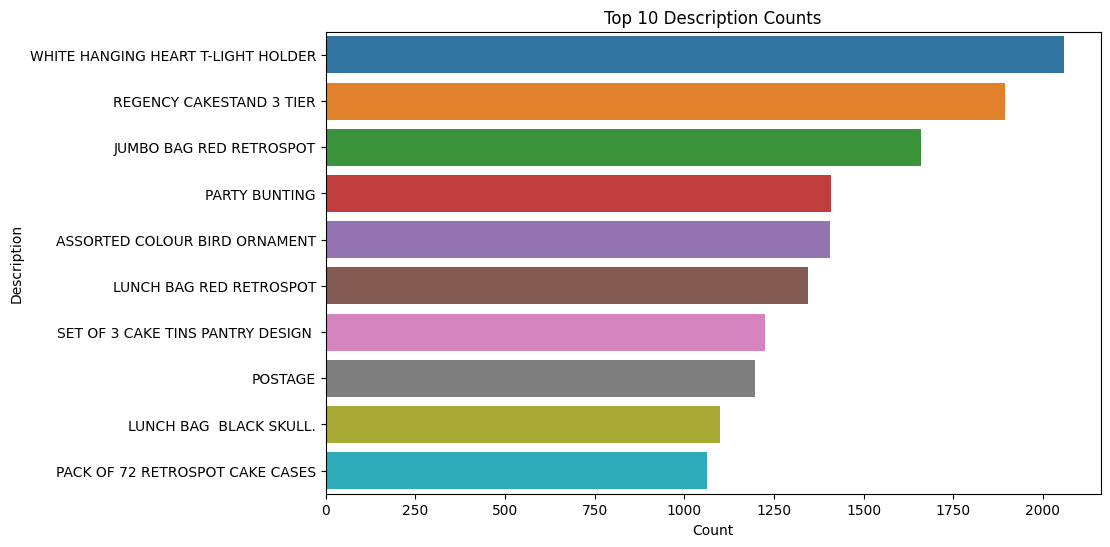

c:\Users\LAU\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\LAU\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\LAU\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


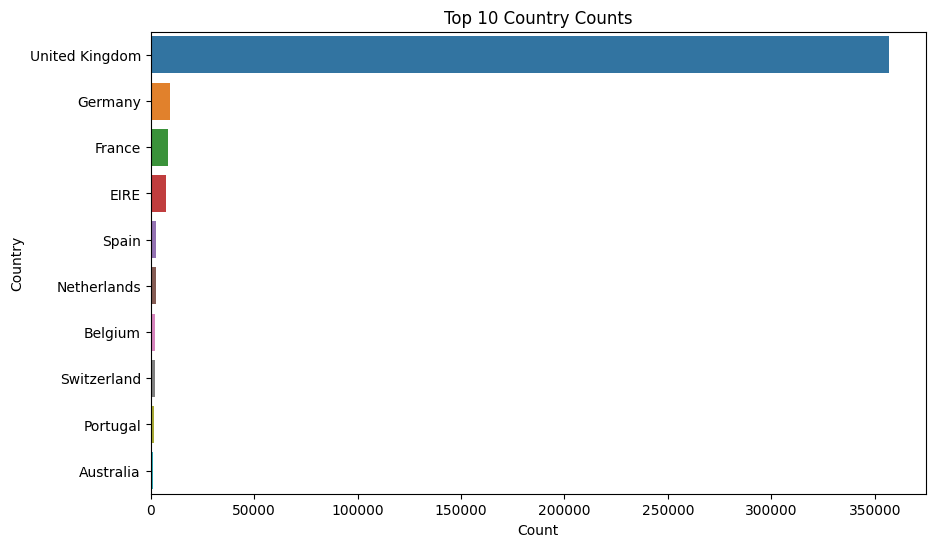

In [101]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram for Numerical Features
numerical_features = ['Recency', 'Frequency', 'Monetary']

for feature in numerical_features:
    plt.figure(figsize=(8, 6))
    sns.histplot(df[feature], kde=True, color='blue')
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.show()

# Bar Chart for Categorical Features
categorical_features = ['Description', 'Country']

for feature in categorical_features:
    plt.figure(figsize=(10, 6))
    top_categories = df[feature].value_counts().nlargest(10)
    sns.barplot(x=top_categories, y=top_categories.index)
    plt.title(f'Top 10 {feature} Counts')
    plt.xlabel('Count')
    plt.ylabel(feature)
    plt.show()




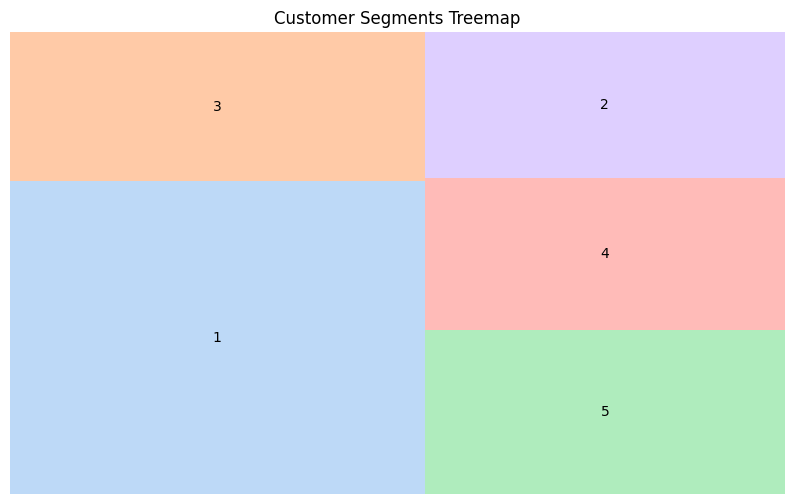

In [102]:
import matplotlib.pyplot as plt
import squarify

# Assuming 'df' is your DataFrame and 'customer_segment' is the column containing segments
segment_counts = df['customer_segment'].value_counts()

# Create labels and sizes for squarify
labels = segment_counts.index
sizes = segment_counts.values

# Create the squarify plot
plt.figure(figsize=(10, 6))
squarify.plot(sizes=sizes, label=labels, color=sns.color_palette('pastel'), alpha=0.7)

plt.title('Customer Segments Treemap')
plt.axis('off')  # Turn off axis
plt.show()


In [113]:
top_n = 10  # Choose the number of top categories to keep
top_categories = df['Description'].value_counts().nlargest(top_n).index
df['Description'] = np.where(df['Description'].isin(top_categories), df['Description'], 'Other')


In [114]:
top_n = 10  # Choose the number of top categories to keep
top_countries = df['Country'].value_counts().nlargest(top_n).index
df['Country'] = np.where(df['Country'].isin(top_countries), df['Country'], 'Other')


In [116]:
X = df_downsampled[['InvoiceNo','Quantity','UnitPrice','CustomerID','Recency','Frequency',	'Monetary','receny_score','frequency_score','monetary_score']]

Y= df_downsampled['customer_segment']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [117]:
print(X_train.sample(5))

        InvoiceNo  Quantity  UnitPrice  CustomerID  Recency  Frequency  \
397286     580675        10       2.08       15640       94         17   
8810       537374         6       2.55       17259       94          2   
401471     581003        12       1.95       14911       94        248   
184006     559545         3       2.89       15467       94          4   
393478     580389         2       8.50       12952       94          5   

        Monetary  receny_score  frequency_score  monetary_score  
397286     12433             5                4               5  
8810         603             1                1               1  
401471    132573             5                5               5  
184006       512             3                2               1  
393478      1383             5                2               2  


In [118]:
print(X_test.sample(5))

        InvoiceNo  Quantity  UnitPrice  CustomerID  Recency  Frequency  \
309859     572452        12       0.85       12921       94         50   
42731      541995        12       1.45       13158       94          4   
132666     553048        12       0.83       14291       94         12   
363275     577411        48       0.29       17387       94          2   
285913     570228         2       1.65       15821       94          2   

        Monetary  receny_score  frequency_score  monetary_score  
309859     16390             4                5               5  
42731       1201             1                2               2  
132666      3873             2                4               4  
363275       784             5                1               1  
285913       571             4                1               1  


In [119]:
print(Y_train.sample(5))

97439     4
329075    1
340906    2
332241    3
110708    5
Name: customer_segment, dtype: int64


In [120]:
print(Y_test.sample(5))

225351    1
149289    5
290968    2
397942    2
193437    1
Name: customer_segment, dtype: int64


In [122]:
print(df.shape[1])
num_classes=df.shape[1]

15


In [123]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Define the model
model = Sequential()

# Add layers to the model
model.add(Dense(units=64, activation='relu', input_shape=(X_train.shape[1],)))  # Assuming X_train has the correct shape
model.add(Dense(units=32, activation='relu'))
model.add(Dense(units=num_classes, activation='softmax'))  # Replace num_classes with actual number of classes

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Print the model summary to see the architecture
model.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 64)                704       
                                                                 
 dense_7 (Dense)             (None, 32)                2080      
                                                                 
 dense_8 (Dense)             (None, 15)                495       
                                                                 
Total params: 3279 (12.81 KB)
Trainable params: 3279 (12.81 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [124]:
print(type(Y_train))
print(Y_train.dtype)


<class 'pandas.core.series.Series'>
int64


In [125]:
%pip install torch
import torch

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [127]:
model.fit(X_train,Y_train, epochs=10, batch_size=32)


Epoch 1/10
7368/7368 [==============================] - 17s 2ms/step - loss: 597.5332 - accuracy: 0.3189
Epoch 2/10
7368/7368 [==============================] - 14s 2ms/step - loss: 186.7733 - accuracy: 0.3439
Epoch 3/10
7368/7368 [==============================] - 16s 2ms/step - loss: 8.4769 - accuracy: 0.2132
Epoch 4/10
7368/7368 [==============================] - 16s 2ms/step - loss: 1.6550 - accuracy: 0.2003
Epoch 5/10
7368/7368 [==============================] - 15s 2ms/step - loss: 1.6368 - accuracy: 0.2005
Epoch 6/10
7368/7368 [==============================] - 16s 2ms/step - loss: 1.6103 - accuracy: 0.1994
Epoch 7/10
7368/7368 [==============================] - 16s 2ms/step - loss: 1.6292 - accuracy: 0.1997
Epoch 8/10
7368/7368 [==============================] - 15s 2ms/step - loss: 1.6095 - accuracy: 0.1993
Epoch 9/10
7368/7368 [==============================] - 15s 2ms/step - loss: 1.6095 - accuracy: 0.1996
Epoch 10/10
7368/7368 [==============================] - 15s 2ms/step

In [128]:
test_loss, test_accuracy = model.evaluate(X_test, Y_test)
print(f"Test accuracy: {test_accuracy}")


1842/1842 [==============================] - 3s 2ms/step - loss: 1.6097 - accuracy: 0.1985
Test accuracy: 0.19845269620418549


In [129]:
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report


In [130]:
params = {
    'objective': 'multiclass', # Set to 'binary' for binary classification
    'num_class': num_classes,  # Number of classes in your classification problem
    'metric': 'multi_logloss', # Evaluation metric to use
    'boosting_type': 'gbdt',   # Type of boosting algorithm
    'num_leaves': 31,          # Maximum number of leaves in one tree
    'learning_rate': 0.05,     # Learning rate of the model
}


In [133]:
train_data = lgb.Dataset(X_train, label=Y_train)
test_data = lgb.Dataset(X_test, label=Y_test, reference=train_data)


In [136]:
num_round = 50  # Number of boosting rounds (or iterations)
bst = lgb.train(params, train_data, num_round, valid_sets=[test_data])


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003169 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1433
[LightGBM] [Info] Number of data points in the train set: 235764, number of used features: 10
[LightGBM] [Info] Start training from score -34.538776
[LightGBM] [Info] Start training from score -1.610240
[LightGBM] [Info] Start training from score -1.610877
[LightGBM] [Info] Start training from score -1.608014
[LightGBM] [Info] Start training from score -1.610558
[LightGBM] [Info] Start training from score -1.607506
[LightGBM] [Info] Start training from score -34.538776
[LightGBM] [Info] Start training from score -34.538776
[LightGBM] [Info] Start training from score -34.538776
[LightGBM] [Info] Start training from score -34.538776
[LightGBM] [Info] Start training from score -34.538776
[LightGBM] [Info] Start training from score -3

In [137]:
y_pred = bst.predict(X_test, num_iteration=bst.best_iteration)
y_pred_max = [np.argmax(val) for val in y_pred]


In [139]:
print(f"Accuracy: {accuracy_score(Y_test, y_pred_max)}")
print(classification_report(Y_test, y_pred_max))


Accuracy: 1.0
              precision    recall  f1-score   support

           1       1.00      1.00      1.00     11826
           2       1.00      1.00      1.00     11856
           3       1.00      1.00      1.00     11721
           4       1.00      1.00      1.00     11841
           5       1.00      1.00      1.00     11697

    accuracy                           1.00     58941
   macro avg       1.00      1.00      1.00     58941
weighted avg       1.00      1.00      1.00     58941



<Axes: title={'center': 'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

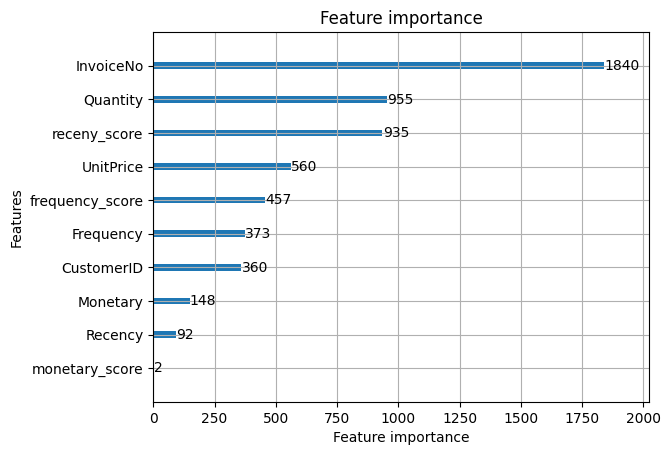

In [140]:
lgb.plot_importance(bst, max_num_features=10)  # Visualizing the top features
